<a href="https://colab.research.google.com/github/AdriGut/Optimizaci-n-del-Gasto-de-Medicare-por-Beneficiario-en-un-Hospital/blob/main/Proyecto_AdrianaGutierrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Tiene formato de código
```


## Business Case: Optimización del Gasto de Medicare por Beneficiario en un Hospital

1. Definición del problema o la oportunidad:
Los Hospitales enfrentan desafíos en la optimización del gasto de Medicare por beneficiario (MSPB). A pesar de brindar atención de alta calidad, existe una variabilidad en el gasto por paciente de Medicare en comparación con el promedio nacional. Esta variabilidad sugiere oportunidades para mejorar la eficiencia y reducir los costos sin comprometer la calidad de la atención. Los Hospitales reconocen esta oportunidad como una vía para mejorar su rendimiento financiero y fortalecer su posición como líderes en el cuidado de la salud en la comunidad.

2. Objetivos del proyecto:

* Predicción de gastos médicos por estado, teniendo en cuenta los hospitales

* Reducción de la variabilidad en el gasto MSPB: El principal objetivo del proyecto es reducir la variabilidad en el gasto de Medicare por beneficiario en un Hospital. Esto implica identificar áreas de mejora y establecer prácticas estándar que permitan al hospital mantener o mejorar la calidad de la atención mientras se reducen los costos asociados.

* Mejora de la eficiencia operativa: Se busca mejorar la eficiencia operativa de un Hospital mediante la identificación y eliminación de prácticas ineficientes que contribuyan a un mayor gasto por paciente de Medicare. Esto incluye optimizar los procesos de atención, la gestión de recursos y la utilización de tecnología.

* Optimización del rendimiento financiero: El proyecto tiene como objetivo mejorar el rendimiento financiero de un Hospital al reducir la variabilidad en el gasto de Medicare por beneficiario y mejorar la eficiencia operativa. Esto se traducirá en una mejor gestión de los recursos financieros y una mayor sostenibilidad a largo plazo.

3. Solución propuesta:

* Análisis de datos y evaluación de la variabilidad: Se realizará un análisis exhaustivo de los datos de gasto de Medicare por beneficiario en un Hospital para identificar áreas de variabilidad y oportunidades de mejora. Se utilizarán técnicas de análisis de datos para identificar patrones y tendencias.
* Desarrollo e implementación de intervenciones: Basado en el análisis de datos, se desarrollarán e implementarán intervenciones específicas para reducir la variabilidad en el gasto de Medicare por beneficiario. Esto puede incluir la optimización de procesos clínicos y administrativos, la gestión de medicamentos y la mejora de la coordinación de la atención.
* Seguimiento y evaluación continua: Se establecerán métricas de rendimiento para monitorear el impacto de las intervenciones implementadas y realizar ajustes según sea necesario. Esto garantizará que se alcancen los objetivos del proyecto y se mantenga una mejora continua en el gasto de Medicare por beneficiario en el Hospital.

# Descripción de la base de datos

La medida de gasto por beneficiario de Medicare (MSPB o “gasto hospitalario por paciente de Medicare”) muestra si Medicare gasta más, menos o aproximadamente lo mismo en un episodio de atención para un paciente de Medicare tratado en un hospital específico en comparación con cuánto gasta Medicare.

La puntuación de la medida MSPB es una proporción calculada dividiendo la cantidad que Medicare gastó por paciente para un episodio de atención iniciada en un hospital por la cantidad mediana que Medicare gastó por episodio de atención a nivel nacional.

 * Una proporción igual a 1 indica que un hospital gasta aproximadamente LO MISMO que la cantidad mediana nacional de MSPB
 * Una proporción superior a 1 indica que un hospital gasta MÁS que la cantidad media nacional del MSPB en todos los hospitales para pacientes hospitalizados a nivel nacional.
 * Una proporción inferior a 1 indica que un hospital gasta MENOS que la cantidad media nacional del MSPB en todos los hospitales para pacientes hospitalizados a nivel nacional.

Esta base de datos describe el gasto hospitalario de Medicare por beneficiario, contiene datos de identificación de las personas como Facility ID, Facility Name, Address,City/Town, State, ZIP Code, County/Parish, Telephone Number. También la medición de MSPB y el resultado "score" y la fecha de inicio y de final de la atención.

Base de datos tomada de : https://data.cms.gov/provider-data/dataset/rrqw-56er

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/Datasets

/content/drive/.shortcut-targets-by-id/1BwJ22xb0gX47bn3ZwAcgShXvKDenxaki/Datasets


In [ ]:
 !pip install  pyjanitor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
import spacy
import spacy.displacy
import janitor as jan
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
!file Medicare_Hospital_Spending_Per_Patient-Hospital.csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Medicare_Hospital_Spending_Per_Patient-Hospital.csv: CSV text


In [ ]:
csv_dataA = pd.read_csv('Medicare_Hospital_Spending_Per_Patient-Hospital.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
csv_dataA.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MSPB-1,Medicare hospital spending per patient (Medica...,1.04,NaN,01/01/2022,12/31/2022
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,MSPB-1,Medicare hospital spending per patient (Medica...,0.95,NaN,01/01/2022,12/31/2022
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,MSPB-1,Medicare hospital spending per patient (Medica...,1.00,NaN,01/01/2022,12/31/2022
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,MSPB-1,Medicare hospital spending per patient (Medica...,1.01,NaN,01/01/2022,12/31/2022
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,MSPB-1,Medicare hospital spending per patient (Medica...,1.11,NaN,01/01/2022,12/31/2022


**Retroalimentación**

1.	El estudiante expuso de manera clara y detallada el problema y los objetivos del caso de negocio derivados de la base de datos seleccionada.
2.	La solución general propuesta por el estudiante aborda adecuadamente el problema presentado, ofreciendo un enfoque sólido y coherente.
3.	Se aprecia que el estudiante presentó de forma completa la base de datos y las variables que serán utilizadas en el desarrollo del proyecto, lo que demuestra una comprensión adecuada de los recursos disponibles.

**Evaluación**: Satisfactoria. Se cumple con los requisitos establecidos y se evidencia un buen entendimiento de los aspectos fundamentales del proyecto.



In [ ]:
csv_dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Facility ID       4645 non-null   int64  
 1   Facility Name     4645 non-null   object 
 2   Address           4645 non-null   object 
 3   City/Town         4645 non-null   object 
 4   State             4645 non-null   object 
 5   ZIP Code          4645 non-null   int64  
 6   County/Parish     4645 non-null   object 
 7   Telephone Number  4645 non-null   object 
 8   Measure ID        4645 non-null   object 
 9   Measure Name      4645 non-null   object 
 10  Score             4645 non-null   object 
 11  Footnote          1659 non-null   float64
 12  Start Date        4645 non-null   object 
 13  End Date          4645 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 508.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vscore= (csv_dataA['Score']).to_numpy().tolist()
vscore[8]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Not Available'

In [ ]:
# @title Promedio de los Score es 0.99 para reemplazar los Not Available
#lista_menor= score_menor['Score'].to_numpy().tolist()
#lista_mayor= score_mayor['Score'].to_numpy().tolist()
#lista_igual=score_uno['Score'].to_numpy().tolist()
#suma=0
#for i in lista_menor:
#  suma += i
#for i in lista_igual:
#  suma += i
#for i in lista_mayor:
#  suma += i

#promedio= suma/total
#promedio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Revisar
for x in range(len(vscore)):
  if vscore[x] == 'Not Available':
    vscore[x]=0.99
vscore[8]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.99

In [ ]:
csv_dataA['Score']= vscore
csv_dataA['Score']=csv_dataA['Score'].astype(float)
csv_dataA['Score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       1.04
1       0.95
2       1.00
3       1.01
4       1.11
        ... 
4640    1.13
4641    0.96
4642    0.99
4643    0.99
4644    1.10
Name: Score, Length: 4645, dtype: float64

In [ ]:
score_menor = csv_dataA.query("Score < 1")
score_menor.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,MSPB-1,Medicare hospital spending per patient (Medica...,0.95,NaN,01/01/2022,12/31/2022
8,10018,CALLAHAN EYE HOSPITAL,1720 UNIVERSITY BLVD STE 305,BIRMINGHAM,AL,35233,JEFFERSON,(205) 325-8596,MSPB-1,Medicare hospital spending per patient (Medica...,0.99,1.0,01/01/2022,12/31/2022
11,10022,CHEROKEE MEDICAL CENTER,400 NORTHWOOD DR,CENTRE,AL,35960,CHEROKEE,(256) 927-5531,MSPB-1,Medicare hospital spending per patient (Medica...,0.94,NaN,01/01/2022,12/31/2022
14,10029,THE EAST ALABAMA HEALTHCARE AUTHORITY,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,LEE,(334) 749-3411,MSPB-1,Medicare hospital spending per patient (Medica...,0.95,NaN,01/01/2022,12/31/2022
15,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,JEFFERSON,(205) 934-4011,MSPB-1,Medicare hospital spending per patient (Medica...,0.98,NaN,01/01/2022,12/31/2022


In [ ]:
score_menor.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State',
       'ZIP Code', 'County/Parish', 'Telephone Number', 'Measure ID',
       'Measure Name', 'Score', 'Footnote', 'Start Date', 'End Date'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


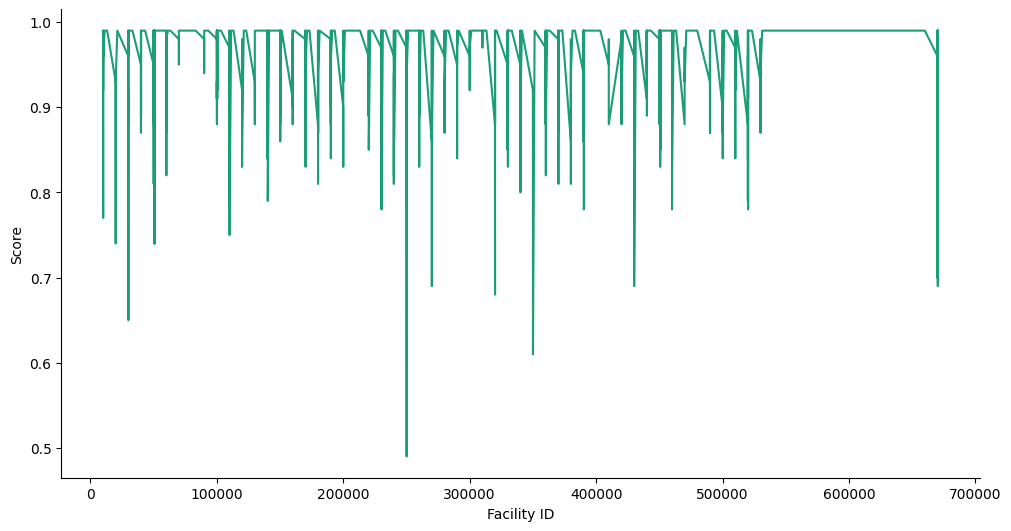

In [ ]:
# @title Facility ID vs Score menor a uno

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Facility ID']
  ys = series['Score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = score_menor.sort_values('Facility ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Facility ID')
_ = plt.ylabel('Score')

In [ ]:
resum_menor_1 = score_menor.groupby('Facility ID')[["Score",'Start Date','End Date']].apply(lambda x: x)
resum_menor_1.reset_index(inplace=True)
resum_menor_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility ID,level_1,Score,Start Date,End Date
0,10005,1,0.95,01/01/2022,12/31/2022
1,10018,8,0.99,01/01/2022,12/31/2022
2,10022,11,0.94,01/01/2022,12/31/2022
3,10029,14,0.95,01/01/2022,12/31/2022
4,10033,15,0.98,01/01/2022,12/31/2022
...,...,...,...,...,...
3237,670280,4638,0.99,01/01/2022,12/31/2022
3238,670285,4639,0.99,01/01/2022,12/31/2022
3239,670309,4641,0.96,01/01/2022,12/31/2022
3240,670310,4642,0.99,01/01/2022,12/31/2022


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


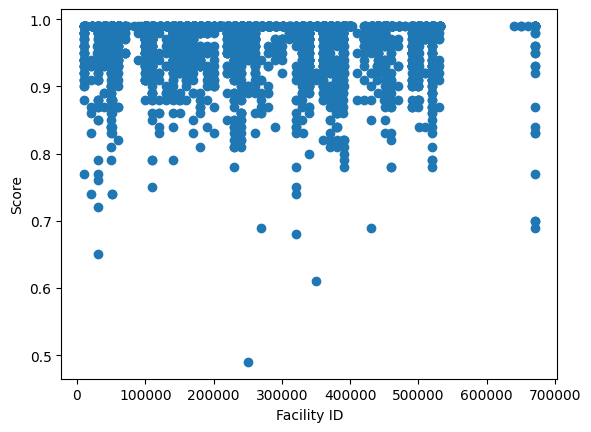

In [ ]:
# @title Score menor a 1 vs Facility ID
plt.scatter(resum_menor_1['Facility ID'], resum_menor_1['Score'])
plt.xlabel('Facility ID')
_ = plt.ylabel('Score')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


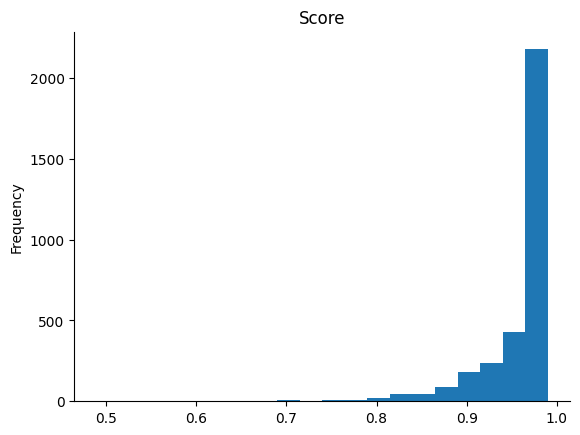

In [ ]:
# Revisar histograma de Score menor a 1
resum_menor_1['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
score_uno = csv_dataA.query("Score == 1")
score_uno.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,MSPB-1,Medicare hospital spending per patient (Medica...,1.0,NaN,01/01/2022,12/31/2022
5,10011,ST. VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,(205) 838-3122,MSPB-1,Medicare hospital spending per patient (Medica...,1.0,NaN,01/01/2022,12/31/2022
45,10092,DCH REGIONAL MEDICAL CENTER,809 UNIVERSITY BOULEVARD EAST,TUSCALOOSA,AL,35401,TUSCALOOSA,(205) 759-7111,MSPB-1,Medicare hospital spending per patient (Medica...,1.0,NaN,01/01/2022,12/31/2022
129,30064,BANNER - UNIVERSITY MEDICAL CENTER TUCSON CAMPUS,1625 NORTH CAMPBELL AVENUE,TUCSON,AZ,85719,PIMA,(520) 874-4189,MSPB-1,Medicare hospital spending per patient (Medica...,1.0,NaN,01/01/2022,12/31/2022
136,30083,ABRAZO SCOTTSDALE CAMPUS,3929 EAST BELL ROAD,PHOENIX,AZ,85032,MARICOPA,(602) 923-5609,MSPB-1,Medicare hospital spending per patient (Medica...,1.0,NaN,01/01/2022,12/31/2022


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


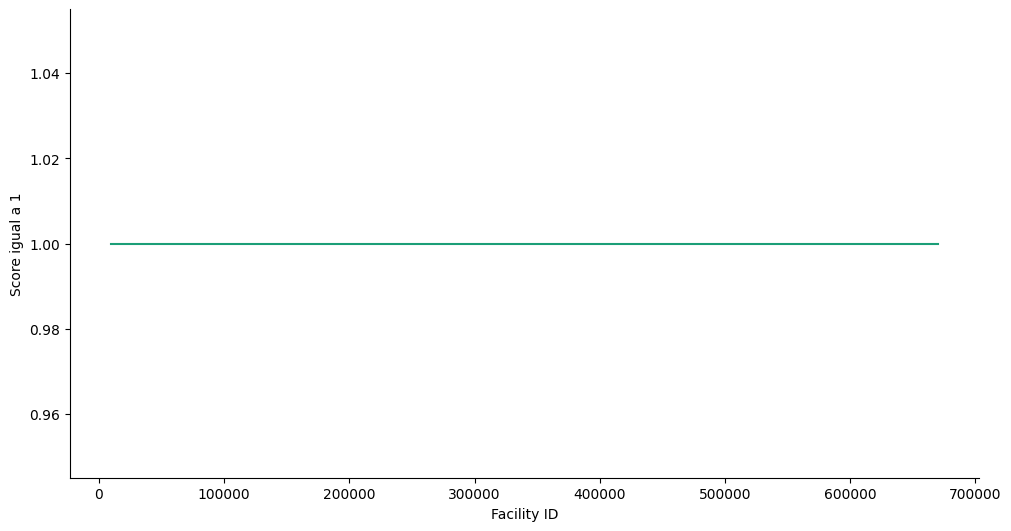

In [ ]:
# @title Facility ID vs Score igual a uno

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Facility ID']
  ys = series['Score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = score_uno.sort_values('Facility ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Facility ID')
_ = plt.ylabel('Score igual a 1')

In [ ]:
resum_igual_1 = score_uno.groupby('Facility ID')[["Score",'Start Date','End Date']].apply(lambda x: x)
resum_igual_1.reset_index(inplace=True)
resum_igual_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility ID,level_1,Score,Start Date,End Date
0,10006,2,1.0,01/01/2022,12/31/2022
1,10011,5,1.0,01/01/2022,12/31/2022
2,10092,45,1.0,01/01/2022,12/31/2022
3,30064,129,1.0,01/01/2022,12/31/2022
4,30083,136,1.0,01/01/2022,12/31/2022
...,...,...,...,...,...
181,510062,4390,1.0,01/01/2022,12/31/2022
182,520087,4449,1.0,01/01/2022,12/31/2022
183,520096,4454,1.0,01/01/2022,12/31/2022
184,670120,4620,1.0,01/01/2022,12/31/2022


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


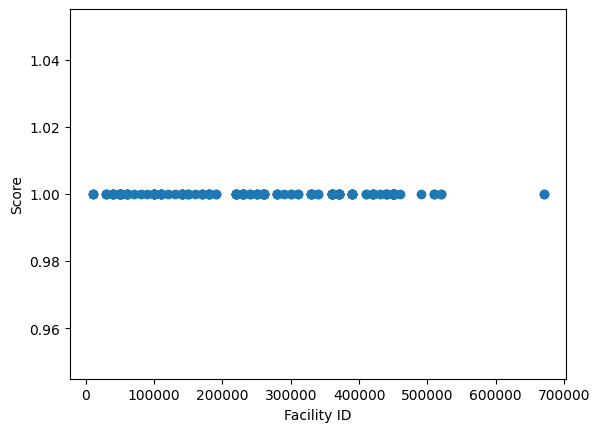

In [ ]:
# @title Score igual 1 vs Facility ID
plt.scatter(resum_igual_1['Facility ID'], resum_igual_1['Score'])
plt.xlabel('Facility ID')
_ = plt.ylabel('Score')

In [ ]:
score_mayor = csv_dataA.query("Score > 1 and Score <2")
score_mayor.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MSPB-1,Medicare hospital spending per patient (Medica...,1.04,NaN,01/01/2022,12/31/2022
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,MSPB-1,Medicare hospital spending per patient (Medica...,1.01,NaN,01/01/2022,12/31/2022
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,MSPB-1,Medicare hospital spending per patient (Medica...,1.11,NaN,01/01/2022,12/31/2022
6,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,(256) 845-3150,MSPB-1,Medicare hospital spending per patient (Medica...,1.03,NaN,01/01/2022,12/31/2022
7,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,SHELBY,(205) 620-8100,MSPB-1,Medicare hospital spending per patient (Medica...,1.06,NaN,01/01/2022,12/31/2022


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


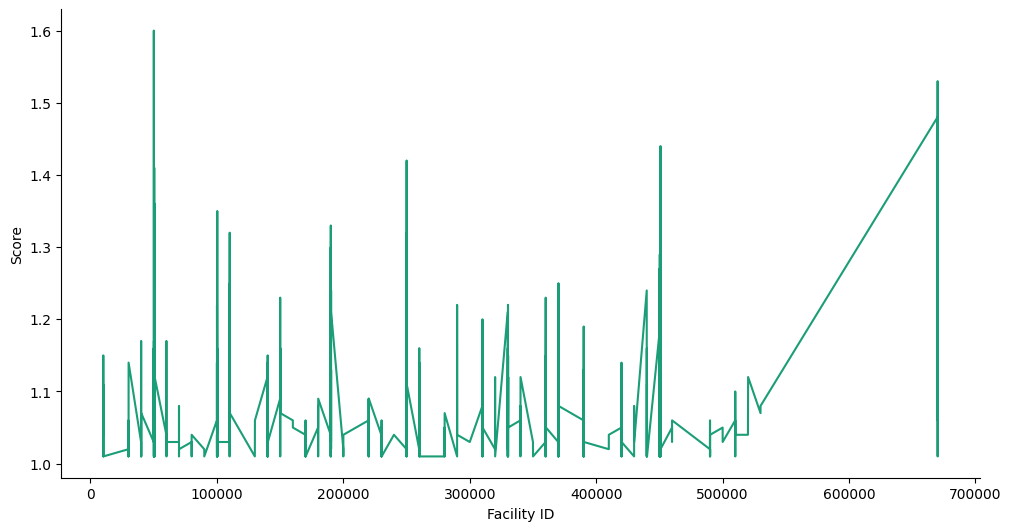

In [ ]:
# @title Facility ID vs Score Mayor a Uno

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Facility ID']
  ys = series['Score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = score_mayor.sort_values('Facility ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Facility ID')
_ = plt.ylabel('Score')

In [ ]:
resum_mayor_1 = score_mayor.groupby('Facility ID')[["Score",'Start Date','End Date']].apply(lambda x: x)
resum_mayor_1.reset_index(inplace=True)
resum_mayor_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility ID,level_1,Score,Start Date,End Date
0,10001,0,1.04,01/01/2022,12/31/2022
1,10007,3,1.01,01/01/2022,12/31/2022
2,10008,4,1.11,01/01/2022,12/31/2022
3,10012,6,1.03,01/01/2022,12/31/2022
4,10016,7,1.06,01/01/2022,12/31/2022
...,...,...,...,...,...
1212,670132,4627,1.13,01/01/2022,12/31/2022
1213,670136,4631,1.07,01/01/2022,12/31/2022
1214,670260,4634,1.06,01/01/2022,12/31/2022
1215,670300,4640,1.13,01/01/2022,12/31/2022


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


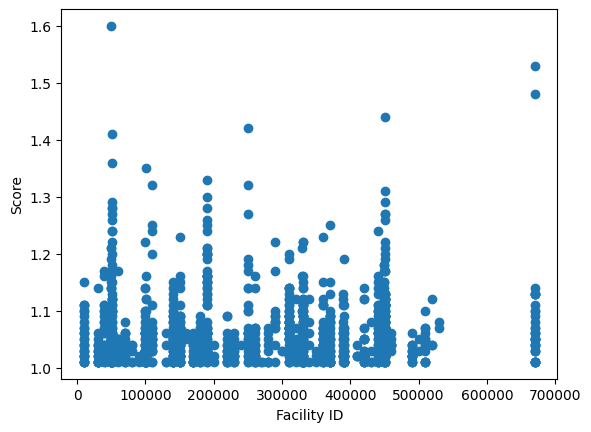

In [ ]:
# @title Score mayor a 1 vs Facility ID
plt.scatter(resum_mayor_1['Facility ID'], resum_mayor_1['Score'])
plt.xlabel('Facility ID')
_ = plt.ylabel('Score')

In [ ]:
datos_menor=len(score_menor)
datos_uno=len(score_uno)
datos_mayor=len(score_mayor)
total=datos_menor+datos_mayor+datos_uno
print(f"El total de datos con Score es: {total}")
datos_faltantes= len(csv_dataA)-total
print(f"De {len(csv_dataA)} datos totales hay {datos_faltantes} faltantes")

El total de datos con Score es: 4645
De 4645 datos totales hay 0 faltantes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualizacion en mapa

In [ ]:
!pip install descartes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import geopandas as gpd # Le damos el álias gpd al módulo geopandas

import descartes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapa_ant = gpd.read_file("USA/USA_ZIP_Code_Boundaries.shp")
mapa_ant



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
nombres_viejos = mapa_ant.columns  # Estraemos los nombres viejos para cambiarlos
# Definimos los cambios de nombres:
cambios = {       nombres_viejos[1]: "ZIP Code"}
mapa_ant.rename(columns=cambios, inplace=True)  # Cambiamos los nombres
mapa_ant.head()

In [ ]:
mapa_ant['ZIP Code']=mapa_ant['ZIP Code'].astype(float)
mapa_ant.info()

In [ ]:
# Cargar los datos
data = score_menor

# Contar la frecuencia de Score por zona

freq_score = data.groupby('ZIP Code')['Score'].value_counts().unstack(fill_value=0)


# Normalizar la frecuencia para asignar colores
normalized_freq_score = freq_score.div(freq_score.sum(axis=1), axis=0)
normalized_freq_score.columns

mapa_zonas = mapa_ant

# Fusionar los datos geoespaciales con los datos de frecuencia de Score
mapa_zonas = mapa_zonas.merge(normalized_freq_score, how='left', left_on='ZIP Code', right_index=True)

#mapa_zonas.plot()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mapa_zonas.plot(cmap='Blues', linewidth=0.8,ax=ax, edgecolor='0.8', legend=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'mapa_ant' is not defined

**Segunda retroalimentacion**

1. Parece que estás incorporando algunas visualizaciones de datos en tu trabajo, lo cual es positivo. Sin embargo, es esencial recordar que el propósito de crear gráficos es poder identificar información relevante o patrones dentro de los datos. No queda claro si las visualizaciones que has incluido hasta ahora te están proporcionando alguna información crucial para el desarrollo de tu caso de negocio. Sería útil que describas cada gráfico que generes, explicando qué información importante ofrece y cómo contribuye al análisis general.

2. En esta etapa del proyecto, es fundamental especificar qué variables se utilizarán para alcanzar los objetivos del caso de negocio. No queda claro cuáles son esas variables en tu caso. Sería beneficioso detallar explícitamente qué variables serán parte del análisis y cómo se relacionan con los objetivos establecidos.

3. Aunque has presentado un caso de negocio en el primer entregable, es importante considerar qué modelo podría ayudar a reducir la variabilidad de los gastos de Medicare. ¿Es este el objetivo principal? ¿Cómo podemos trabajar para disminuir la variabilidad en estos gastos? Sería más efectivo enfocarse en la predicción (donde tu variable dependiente podria ser los gastos en medicare) para abordar este objetivo, ya que permite anticipar posibles fluctuaciones y tomar medidas preventivas en lugar de simplemente reaccionar ante ellas. Ahora bien, en la base de datos que presentas no alguna variable que puedas realizar con los gastos.

In [ ]:
df=csv_dataA
# Estadísticas descriptivas
print(df['Score'].describe())



count    4645.000000
mean        0.991470
std         0.066646
min         0.490000
25%         0.970000
50%         0.990000
75%         1.010000
max         1.600000
Name: Score, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


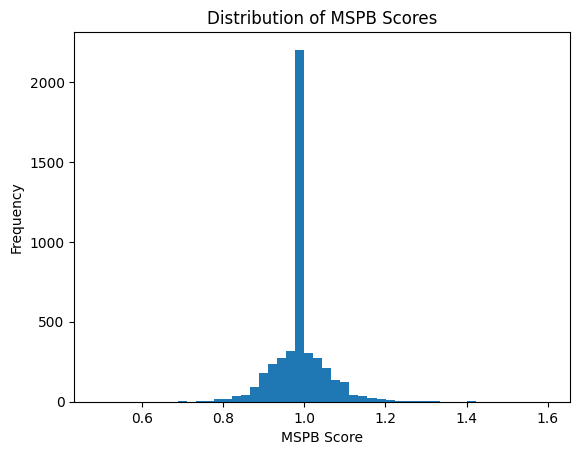

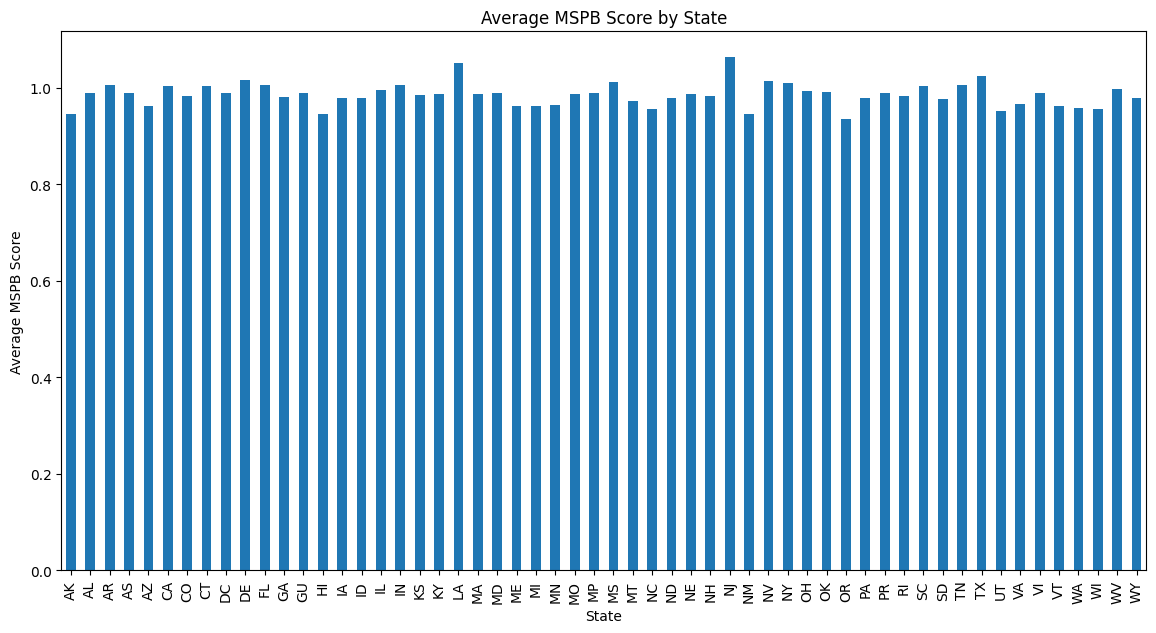

In [ ]:
# Distribución de puntuaciones
plt.hist(df['Score'], bins=50)
plt.xlabel('MSPB Score')
plt.ylabel('Frequency')
plt.title('Distribution of MSPB Scores')
plt.show()

# Comparación por estado
state_mean_scores = df.groupby('State')['Score'].mean()
state_mean_scores.plot(kind='bar', figsize=(14, 7))
plt.xlabel('State')
plt.ylabel('Average MSPB Score')
plt.title('Average MSPB Score by State')
plt.show()



In [ ]:
df.to_excel('df.xlsx',sheet_name="Sheet1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Identificación de outliers
outliers = df[df['Score'] > 1.5]  # Por ejemplo, hospitales que gastan un 50% más que la mediana nacional
a=(outliers[['Facility Name', 'City/Town', 'State', 'Score']])
outliers = pd.DataFrame(a)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Facility Name,City/Town,State,Score
315,WEST COVINA MEDICAL CENTER,WEST COVINA,CA,1.60
4619,WISE HEALTH SYSTEM,FORT WORTH,TX,1.53


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


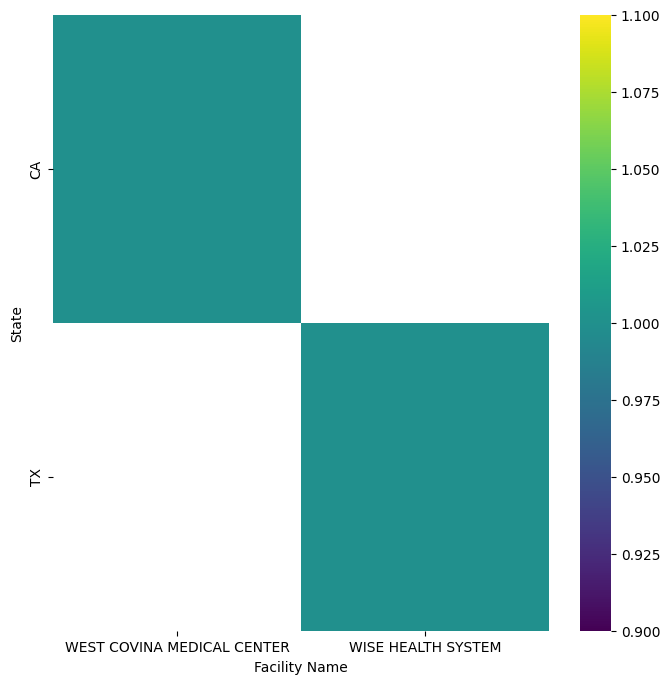

In [ ]:
# @title Facility Name vs City/Town

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['State'].value_counts()
    for x_label, grp in outliers.groupby('Facility Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Facility Name')
_ = plt.ylabel('State')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


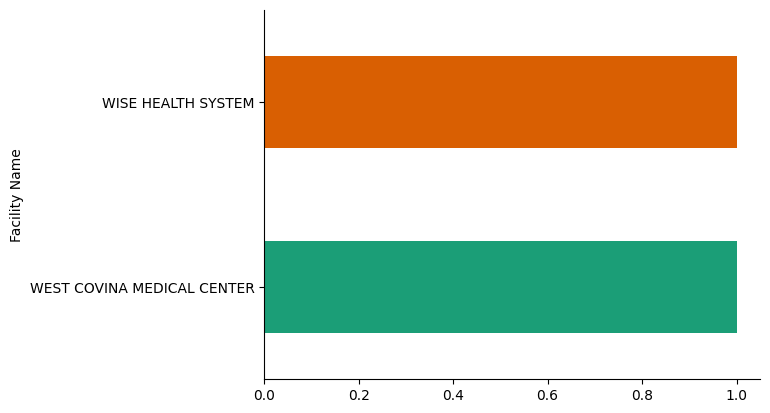

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
outliers.groupby('Facility Name')['State'].size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
outliers.groupby('Facility Name')['State'].size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Cantidad de ciudades que hay por estados
cantidad_ciudad_estado = df.groupby('State')['City/Town']
x=cantidad_ciudad_estado.describe()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#df2 es un dataframe con el state
# count es el numero de hospitales por estado
# unique es la cantidad de ciudades por estadp
df2 = pd.DataFrame(x)
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,unique,top,freq
State,,,,
AK,21,19,ANCHORAGE,3
AL,88,73,BIRMINGHAM,7
AR,79,68,LITTLE ROCK,5
AS,1,1,PAGO PAGO,1
AZ,82,49,PHOENIX,14
CA,327,225,LOS ANGELES,16
CO,84,66,DENVER,6
CT,30,26,HARTFORD,3
DC,7,1,WASHINGTON,7


In [ ]:
df2=df2.reset_index(drop=False)
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,State,count,unique,top,freq
0,AK,21,19,ANCHORAGE,3
1,AL,88,73,BIRMINGHAM,7
2,AR,79,68,LITTLE ROCK,5
3,AS,1,1,PAGO PAGO,1
4,AZ,82,49,PHOENIX,14
5,CA,327,225,LOS ANGELES,16
6,CO,84,66,DENVER,6
7,CT,30,26,HARTFORD,3
8,DC,7,1,WASHINGTON,7
9,DE,7,6,WILMINGTON,2


In [ ]:
# Cantidad de hospitales que hay por estados
cantidad_hospital_estado = df.groupby('State')['Score'].count()
cantidad_hospital_estado.head()
# Hay 56 Estados

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


State
AK    21
AL    88
AR    79
AS     1
AZ    82
Name: Score, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


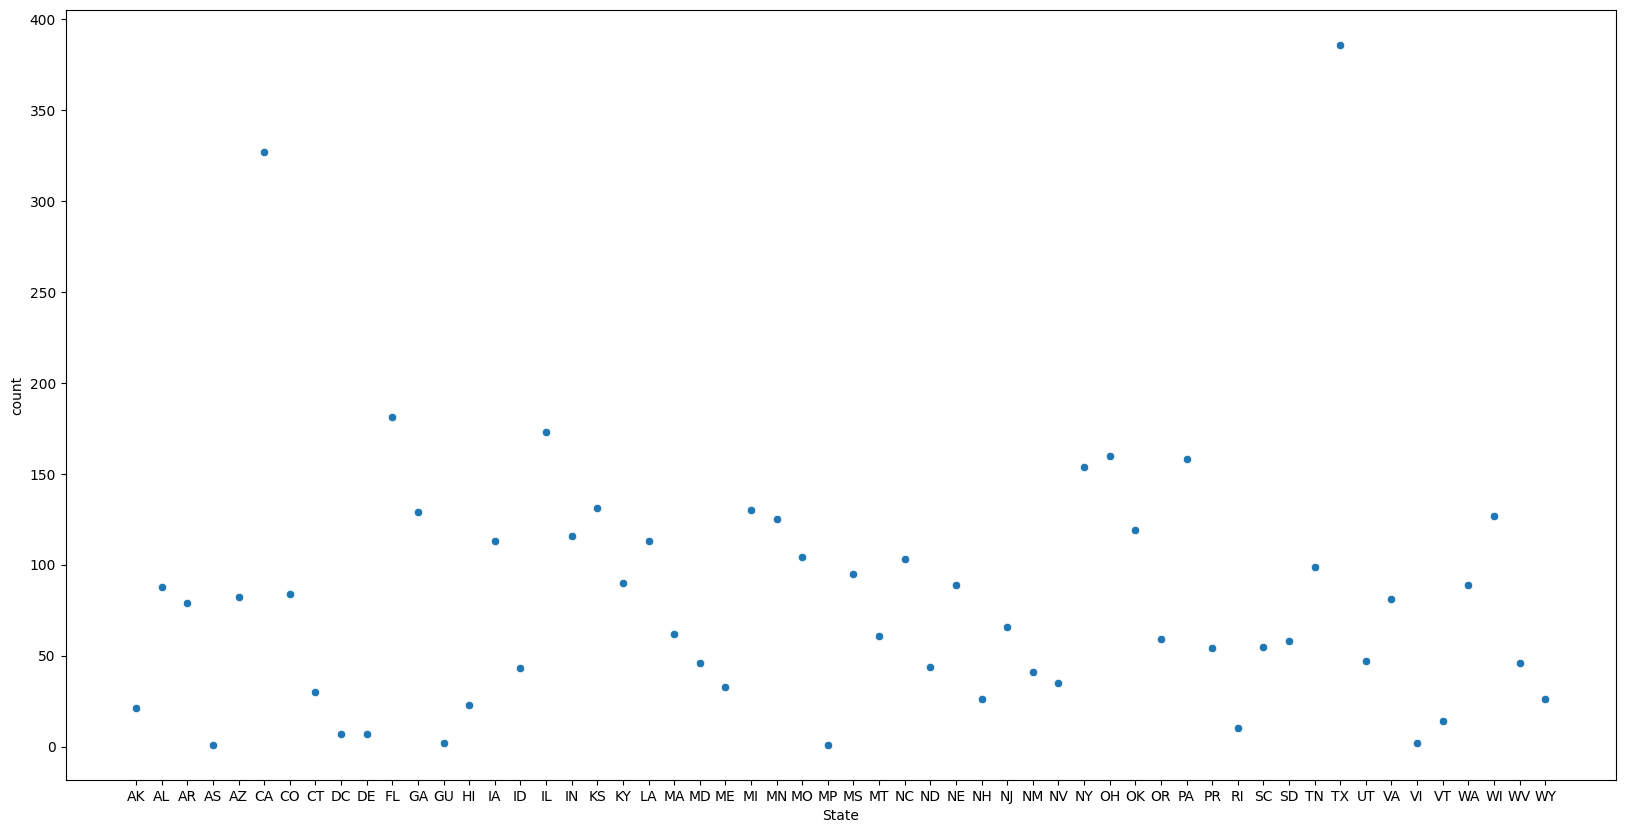

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 10))
#Region
sns.scatterplot(x='State', y='count', data=df2)
# Ajustar el espaciado en el eje X

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


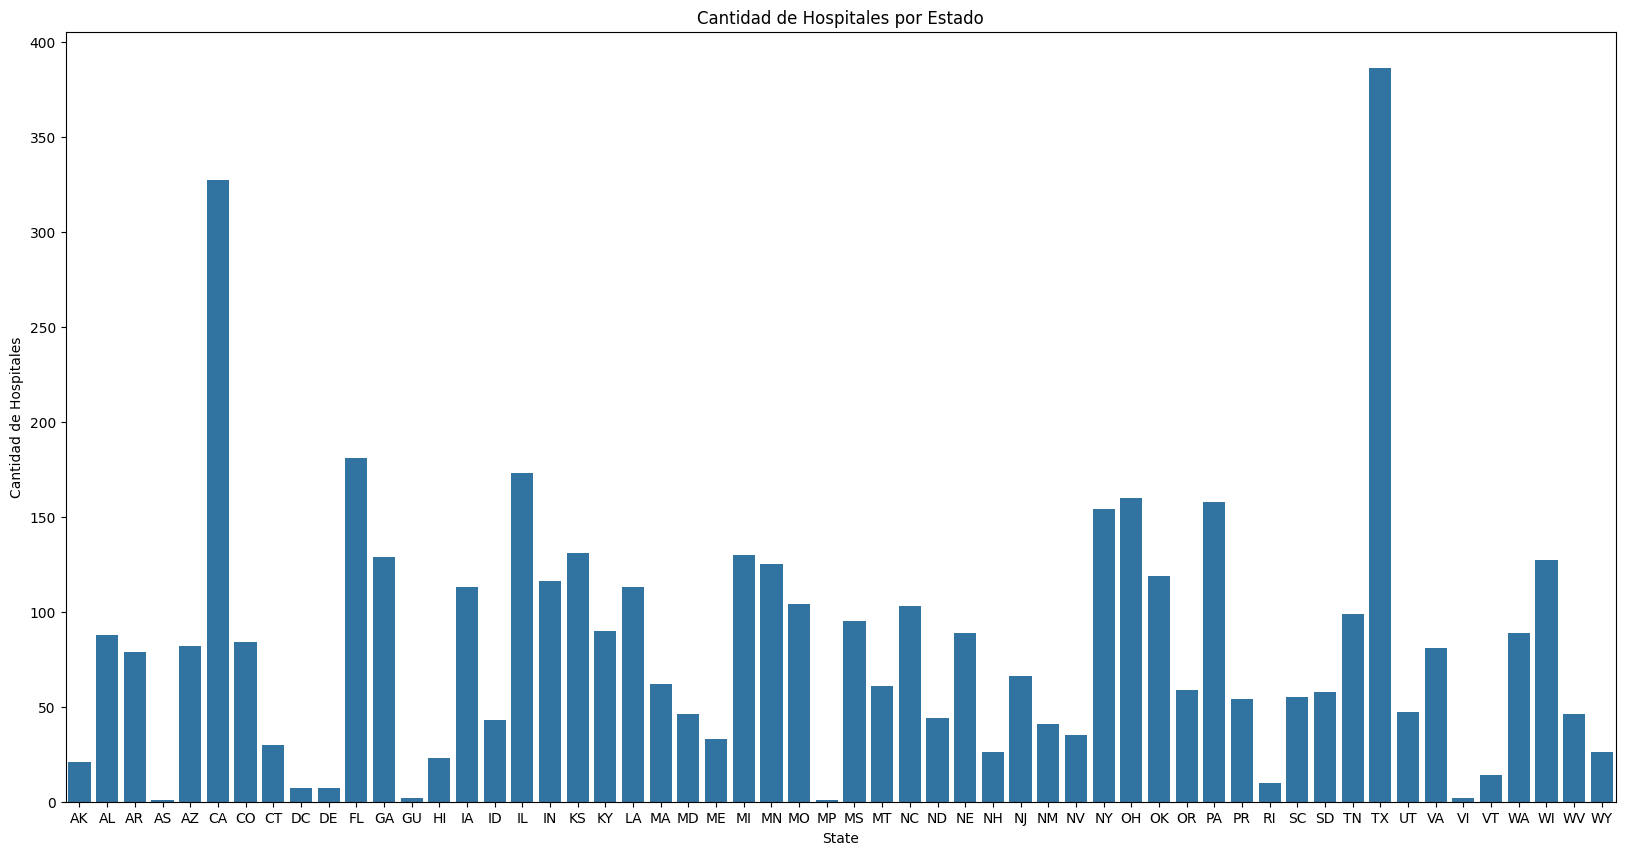

In [ ]:
#Cantidad de hospitales por estado
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(x='State', y='count', data=df2)
# Ajustar el espaciado en el eje X
plt.xlabel('State')
plt.ylabel('Cantidad de Hospitales')
plt.title('Cantidad de Hospitales por Estado')

plt.show()

In [ ]:
media_score_estado= df.groupby('State')['Score'].mean()
media_score_estado=np.array(media_score_estado)
media_score_estado
df2['media']=media_score_estado
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,State,count,unique,top,freq,media
0,AK,21,19,ANCHORAGE,3,0.946667
1,AL,88,73,BIRMINGHAM,7,0.988750
2,AR,79,68,LITTLE ROCK,5,1.006329
3,AS,1,1,PAGO PAGO,1,0.990000
4,AZ,82,49,PHOENIX,14,0.963049
5,CA,327,225,LOS ANGELES,16,1.003180
6,CO,84,66,DENVER,6,0.983929
7,CT,30,26,HARTFORD,3,1.004667
8,DC,7,1,WASHINGTON,7,0.990000
9,DE,7,6,WILMINGTON,2,1.017143


In [ ]:
#Regresión lineal entre la cantidad de hospitales y la media del Score por estado
X = df2['count'] #independiente
y = df2['media'].to_numpy().astype(int) #dependiente


# Obtener los dummies
dummies = pd.get_dummies(X, columns=['State'], drop_first=True)

# Convertir las salidas de los dummies en 1 o 0
dummies = dummies.astype(int)

X=dummies.to_numpy()
# Añadir una constante a X para el término de intersección
X_with_intercept = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X_with_intercept)

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir un resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1.385
Date:                Wed, 03 Jul 2024   Prob (F-statistic):              0.346
Time:                        19:08:13   Log-Likelihood:                 33.249
No. Observations:                  56   AIC:                             31.50
Df Residuals:                       7   BIC:                             130.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.355e-16      0.267   2.38e-15      1.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coeficiente: [ 1.00000000e+00  2.29648814e-17  1.20572616e-16 -4.85514905e-18]
Intercepto: 5.551115123125783e-16
MAE: 1.9176579516252704e-16
RMSE: 2.482534153247273e-16
R^2: 1.0


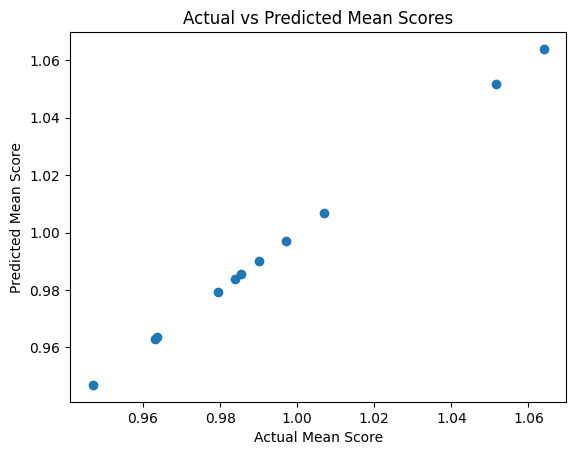

In [ ]:

# Agregar los datos a nivel de estado
state_data = df.groupby('State').agg({
    'Score': ['mean', 'median', 'std'],
    'Facility ID': 'count'
}).reset_index()
state_data.columns = ['State', 'Mean_Score', 'Median_Score', 'Std_Score', 'Facility_Count']
state_data.dropna(inplace=True)
# Variables predictoras y variable objetivo
X1 = state_data[['Mean_Score', 'Median_Score', 'Std_Score', 'Facility_Count']] #independientes
y1 = state_data['Mean_Score']  # Supongamos que queremos predecir el gasto medio, dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
results1=model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
coe=model.coef_
inter=model.intercept_
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Coeficiente: {coe}')
print(f'Intercepto: {inter}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

# Visualización de resultados


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Mean Score')
plt.ylabel('Predicted Mean Score')
plt.title('Actual vs Predicted Mean Scores')
plt.show()


In [ ]:
#Calculo de AIC
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             Mean_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.724e+22
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:08:14   Log-Likelihood:                 1174.6
No. Observations:                  43   AIC:                            -2339.
Df Residuals:                      38   BIC:                            -2330.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.73e-14   5.17e-12      0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Tercera retroalimentación:**

1. Es crucial proporcionar una descripción detallada en cada gráfico o tabla generada, resaltando el patrón o insight identificado durante el análisis.

2. Es fundamental vincular los resultados del modelo de regresión con los objetivos del business case para mejorar la comprensión y relevancia de los hallazgos.

3. Dado que el objetivo es predecir gastos médicos por estado, ¿has considerado evaluar el poder predictivo del modelo de regresión propuesto? ¿Qué estrategias podrías implementar para mejorar la precisión del modelo, teniendo en cuenta que solo dispones de 56 observaciones?

4. En general, al trabajar en un Colab Notebook, es esencial elaborar un informe exhaustivo del análisis de datos realizado. Esto implica proporcionar una descripción clara de cada paso ejecutado durante el proceso.

In [ ]:
df2.to_excel('df2.xlsx',sheet_name="Sheet1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
listapr=[y_test, y_pred]
listapr=pd.DataFrame(listapr)
listapr.to_excel('prueba.xlsx',sheet_name="Sheet1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualización de los datos, esa dirección lleva al archivo de powerBi
https://drive.google.com/file/d/1bMGiQ2Ovc4kOL1pBYxTkK5Ag2283lcdi/view?usp=drive_link